In [19]:
import os
import optuna
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import sklearn
from sklearn import model_selection

os.chdir('C:\\Users\\manon\\OneDrive\\Documents\\OpenClassrooms\\Projet8')

In [37]:
%load_ext pycodestyle_magic
%pycodestyle_on

In [75]:
train = pd.read_csv('train.csv', index_col=0)
test = pd.read_csv('test.csv', index_col=0)

### D'après "Comparison Between 5 Regression Algorithm", les forêts aléatoires semblent particulièrement indiquées pour ces données. C'est donc le modèle sur lequel nous nous pencherons.

In [88]:
train1 = xgb.DMatrix(train.drop(columns="SalePrice"), label=train.SalePrice)
test1 = xgb.DMatrix(test.drop(columns="SalePrice"), label=test.SalePrice)

def objective(trial, train, test):

    param = {
        "objective": "reg:squarederror",
        "eval_metric": "rmse",
        "n_estimators": 10,
        "max_depth": 2
    }

    param["n_estimators"] = trial.suggest_int("n_estimators", 10, 1000)
    param["max_depth"] = trial.suggest_int("max_depth", 2, 32, log=True)

    pruning_callback = optuna.integration.XGBoostPruningCallback(trial,
                                                                 'validation-rmse')
    bst = xgb.train(param, train1, evals=[(test1, 'validation')],
                    callbacks=[pruning_callback], maximize=False)
    preds = bst.predict(test1)

    rmse_score = sklearn.metrics.mean_squared_error(test1.get_label(),
                                                    preds, squared=False)
    return rmse_score


study = optuna.create_study(direction='minimize')
study.optimize(lambda trial: objective(trial, train1, test1), n_trials=100)

trial = study.best_trial

print('RMSE: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2021-06-19 00:13:10,774] A new study created in memory with name: no-name-00a83906-b7af-45d8-8d87-10e459569fcb


[00:13:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734
[5]	validation-rmse:1.39589
[6]	validation-rmse:0.98961
[7]	validation-rmse:0.71074
[8]	validation-rmse:0.51931
[9]	validation-rmse:0.38731


[I 2021-06-19 00:13:10,875] Trial 0 finished with value: 0.3873077630996704 and parameters: {'rf_n_estimators': 46, 'rf_max_depth': 31}. Best is trial 0 with value: 0.3873077630996704.


[00:13:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734
[5]	validation-rmse:1.39589
[6]	validation-rmse:0.98914
[7]	validation-rmse:0.70971
[8]	validation-rmse:0.51795
[9]	validation-rmse:0.38593


[I 2021-06-19 00:13:10,962] Trial 1 finished with value: 0.3859280049800873 and parameters: {'rf_n_estimators': 173, 'rf_max_depth': 4}. Best is trial 1 with value: 0.3859280049800873.


[00:13:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734
[5]	validation-rmse:1.39589
[6]	validation-rmse:0.98961
[7]	validation-rmse:0.71074
[8]	validation-rmse:0.51975
[9]	validation-rmse:0.38642


[I 2021-06-19 00:13:11,048] Trial 2 finished with value: 0.3864147961139679 and parameters: {'rf_n_estimators': 645, 'rf_max_depth': 5}. Best is trial 1 with value: 0.3859280049800873.


[00:13:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734
[5]	validation-rmse:1.39589
[6]	validation-rmse:0.98914
[7]	validation-rmse:0.70971
[8]	validation-rmse:0.51795
[9]	validation-rmse:0.38593


[I 2021-06-19 00:13:11,122] Trial 3 finished with value: 0.3859280049800873 and parameters: {'rf_n_estimators': 949, 'rf_max_depth': 4}. Best is trial 1 with value: 0.3859280049800873.


[00:13:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734
[5]	validation-rmse:1.39589
[6]	validation-rmse:0.98961
[7]	validation-rmse:0.71074
[8]	validation-rmse:0.51938
[9]	validation-rmse:0.38729


[I 2021-06-19 00:13:11,208] Trial 4 finished with value: 0.38729196786880493 and parameters: {'rf_n_estimators': 130, 'rf_max_depth': 7}. Best is trial 1 with value: 0.3859280049800873.


[00:13:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734
[5]	validation-rmse:1.39641


[I 2021-06-19 00:13:11,255] Trial 5 pruned. Trial was pruned at iteration 5.


[00:13:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734
[5]	validation-rmse:1.39589
[6]	validation-rmse:0.98961
[7]	validation-rmse:0.71074
[8]	validation-rmse:0.51931
[9]	validation-rmse:0.38731


[I 2021-06-19 00:13:11,368] Trial 6 pruned. Trial was pruned at iteration 9.


[00:13:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734
[5]	validation-rmse:1.39589
[6]	validation-rmse:0.98844
[7]	validation-rmse:0.70867
[8]	validation-rmse:0.51631
[9]	validation-rmse:0.38524


[I 2021-06-19 00:13:11,502] Trial 7 finished with value: 0.385240763425827 and parameters: {'rf_n_estimators': 900, 'rf_max_depth': 3}. Best is trial 7 with value: 0.385240763425827.


[00:13:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734
[5]	validation-rmse:1.39589


[I 2021-06-19 00:13:11,567] Trial 8 pruned. Trial was pruned at iteration 6.


[00:13:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734
[5]	validation-rmse:1.39589


[I 2021-06-19 00:13:11,626] Trial 9 pruned. Trial was pruned at iteration 6.


[00:13:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734


[I 2021-06-19 00:13:11,691] Trial 10 pruned. Trial was pruned at iteration 5.


[00:13:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734
[5]	validation-rmse:1.39589
[6]	validation-rmse:0.98844
[7]	validation-rmse:0.70867
[8]	validation-rmse:0.51631
[9]	validation-rmse:0.38524


[I 2021-06-19 00:13:11,816] Trial 11 finished with value: 0.385240763425827 and parameters: {'rf_n_estimators': 388, 'rf_max_depth': 3}. Best is trial 7 with value: 0.385240763425827.


[00:13:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734
[5]	validation-rmse:1.39589
[6]	validation-rmse:0.98844
[7]	validation-rmse:0.70867
[8]	validation-rmse:0.51631
[9]	validation-rmse:0.38524


[I 2021-06-19 00:13:11,911] Trial 12 finished with value: 0.385240763425827 and parameters: {'rf_n_estimators': 480, 'rf_max_depth': 3}. Best is trial 7 with value: 0.385240763425827.


[00:13:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734


[I 2021-06-19 00:13:11,968] Trial 13 pruned. Trial was pruned at iteration 5.


[00:13:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734
[5]	validation-rmse:1.39589


[I 2021-06-19 00:13:12,038] Trial 14 pruned. Trial was pruned at iteration 6.


[00:13:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734
[5]	validation-rmse:1.39641


[I 2021-06-19 00:13:12,102] Trial 15 pruned. Trial was pruned at iteration 5.


[00:13:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734
[5]	validation-rmse:1.39589
[6]	validation-rmse:0.98844
[7]	validation-rmse:0.70867
[8]	validation-rmse:0.51631
[9]	validation-rmse:0.38524


[I 2021-06-19 00:13:12,212] Trial 16 finished with value: 0.385240763425827 and parameters: {'rf_n_estimators': 862, 'rf_max_depth': 3}. Best is trial 7 with value: 0.385240763425827.


[00:13:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734
[5]	validation-rmse:1.39589
[6]	validation-rmse:0.98844
[7]	validation-rmse:0.70867
[8]	validation-rmse:0.51631
[9]	validation-rmse:0.38524


[I 2021-06-19 00:13:12,314] Trial 17 finished with value: 0.385240763425827 and parameters: {'rf_n_estimators': 582, 'rf_max_depth': 3}. Best is trial 7 with value: 0.385240763425827.


[00:13:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734
[5]	validation-rmse:1.39589
[6]	validation-rmse:0.98961


[I 2021-06-19 00:13:12,383] Trial 18 pruned. Trial was pruned at iteration 6.


[00:13:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734


[I 2021-06-19 00:13:12,442] Trial 19 pruned. Trial was pruned at iteration 5.


[00:13:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734
[5]	validation-rmse:1.39589


[I 2021-06-19 00:13:12,508] Trial 20 pruned. Trial was pruned at iteration 6.


[00:13:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734
[5]	validation-rmse:1.39589
[6]	validation-rmse:0.98844
[7]	validation-rmse:0.70867
[8]	validation-rmse:0.51631
[9]	validation-rmse:0.38524


[I 2021-06-19 00:13:12,602] Trial 21 finished with value: 0.3856247663497925 and parameters: {'rf_n_estimators': 885, 'rf_max_depth': 3}. Best is trial 7 with value: 0.385240763425827.


[00:13:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734
[5]	validation-rmse:1.39641


[I 2021-06-19 00:13:12,655] Trial 22 pruned. Trial was pruned at iteration 5.


[00:13:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734
[5]	validation-rmse:1.39589
[6]	validation-rmse:0.98844
[7]	validation-rmse:0.70867
[8]	validation-rmse:0.51631
[9]	validation-rmse:0.38524


[I 2021-06-19 00:13:12,751] Trial 23 finished with value: 0.3856247663497925 and parameters: {'rf_n_estimators': 579, 'rf_max_depth': 3}. Best is trial 7 with value: 0.385240763425827.


[00:13:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734
[5]	validation-rmse:1.39589
[6]	validation-rmse:0.98914


[I 2021-06-19 00:13:12,813] Trial 24 pruned. Trial was pruned at iteration 6.


[00:13:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734
[5]	validation-rmse:1.39641


[I 2021-06-19 00:13:12,873] Trial 25 pruned. Trial was pruned at iteration 5.


[00:13:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734
[5]	validation-rmse:1.39589


[I 2021-06-19 00:13:12,940] Trial 26 pruned. Trial was pruned at iteration 6.


[00:13:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734
[5]	validation-rmse:1.39641


[I 2021-06-19 00:13:12,999] Trial 27 pruned. Trial was pruned at iteration 5.


[00:13:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734


[I 2021-06-19 00:13:13,060] Trial 28 pruned. Trial was pruned at iteration 5.


[00:13:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734
[5]	validation-rmse:1.39589
[6]	validation-rmse:0.98844
[7]	validation-rmse:0.70867
[8]	validation-rmse:0.51631
[9]	validation-rmse:0.38524


[I 2021-06-19 00:13:13,157] Trial 29 finished with value: 0.385240763425827 and parameters: {'rf_n_estimators': 397, 'rf_max_depth': 3}. Best is trial 7 with value: 0.385240763425827.


[00:13:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734
[5]	validation-rmse:1.39589
[6]	validation-rmse:0.98844
[7]	validation-rmse:0.70867
[8]	validation-rmse:0.51631
[9]	validation-rmse:0.38524


[I 2021-06-19 00:13:13,258] Trial 30 finished with value: 0.385240763425827 and parameters: {'rf_n_estimators': 268, 'rf_max_depth': 3}. Best is trial 7 with value: 0.385240763425827.


[00:13:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734
[5]	validation-rmse:1.39589
[6]	validation-rmse:0.98844
[7]	validation-rmse:0.70867
[8]	validation-rmse:0.51631
[9]	validation-rmse:0.38524


[I 2021-06-19 00:13:13,357] Trial 31 finished with value: 0.385240763425827 and parameters: {'rf_n_estimators': 10, 'rf_max_depth': 3}. Best is trial 7 with value: 0.385240763425827.


[00:13:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734
[5]	validation-rmse:1.39641


[I 2021-06-19 00:13:13,416] Trial 32 pruned. Trial was pruned at iteration 5.


[00:13:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734
[5]	validation-rmse:1.39589
[6]	validation-rmse:0.98844
[7]	validation-rmse:0.70867
[8]	validation-rmse:0.51631
[9]	validation-rmse:0.38524


[I 2021-06-19 00:13:13,514] Trial 33 finished with value: 0.385240763425827 and parameters: {'rf_n_estimators': 289, 'rf_max_depth': 3}. Best is trial 7 with value: 0.385240763425827.


[00:13:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734
[5]	validation-rmse:1.39641


[I 2021-06-19 00:13:13,572] Trial 34 pruned. Trial was pruned at iteration 5.


[00:13:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734


[I 2021-06-19 00:13:13,627] Trial 35 pruned. Trial was pruned at iteration 5.


[00:13:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734
[5]	validation-rmse:1.39641


[I 2021-06-19 00:13:13,690] Trial 36 pruned. Trial was pruned at iteration 5.


[00:13:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734
[5]	validation-rmse:1.39589


[I 2021-06-19 00:13:13,757] Trial 37 pruned. Trial was pruned at iteration 6.


[00:13:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734
[5]	validation-rmse:1.39589
[6]	validation-rmse:0.98844
[7]	validation-rmse:0.70867
[8]	validation-rmse:0.51631
[9]	validation-rmse:0.38524


[I 2021-06-19 00:13:13,861] Trial 38 finished with value: 0.3856247663497925 and parameters: {'rf_n_estimators': 365, 'rf_max_depth': 3}. Best is trial 7 with value: 0.385240763425827.


[00:13:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734


[I 2021-06-19 00:13:13,920] Trial 39 pruned. Trial was pruned at iteration 5.


[00:13:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734
[5]	validation-rmse:1.39641


[I 2021-06-19 00:13:13,982] Trial 40 pruned. Trial was pruned at iteration 5.


[00:13:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734
[5]	validation-rmse:1.39589
[6]	validation-rmse:0.98844
[7]	validation-rmse:0.70867
[8]	validation-rmse:0.51631
[9]	validation-rmse:0.38524


[I 2021-06-19 00:13:14,082] Trial 41 finished with value: 0.385240763425827 and parameters: {'rf_n_estimators': 414, 'rf_max_depth': 3}. Best is trial 7 with value: 0.385240763425827.


[00:13:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734
[5]	validation-rmse:1.39641


[I 2021-06-19 00:13:14,141] Trial 42 pruned. Trial was pruned at iteration 5.


[00:13:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734
[5]	validation-rmse:1.39641


[I 2021-06-19 00:13:14,199] Trial 43 pruned. Trial was pruned at iteration 5.


[00:13:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734


[I 2021-06-19 00:13:14,260] Trial 44 pruned. Trial was pruned at iteration 5.


[00:13:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734
[5]	validation-rmse:1.39641


[I 2021-06-19 00:13:14,322] Trial 45 pruned. Trial was pruned at iteration 5.


[00:13:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734
[5]	validation-rmse:1.39641


[I 2021-06-19 00:13:14,387] Trial 46 pruned. Trial was pruned at iteration 5.


[00:13:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734


[I 2021-06-19 00:13:14,445] Trial 47 pruned. Trial was pruned at iteration 5.


[00:13:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734
[5]	validation-rmse:1.39589
[6]	validation-rmse:0.98844
[7]	validation-rmse:0.70867
[8]	validation-rmse:0.51631
[9]	validation-rmse:0.38524


[I 2021-06-19 00:13:14,543] Trial 48 finished with value: 0.385240763425827 and parameters: {'rf_n_estimators': 412, 'rf_max_depth': 3}. Best is trial 7 with value: 0.385240763425827.


[00:13:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734
[5]	validation-rmse:1.39589
[6]	validation-rmse:0.98844
[7]	validation-rmse:0.70867
[8]	validation-rmse:0.51631
[9]	validation-rmse:0.38524


[I 2021-06-19 00:13:14,642] Trial 49 finished with value: 0.385240763425827 and parameters: {'rf_n_estimators': 437, 'rf_max_depth': 3}. Best is trial 7 with value: 0.385240763425827.


[00:13:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734


[I 2021-06-19 00:13:14,702] Trial 50 pruned. Trial was pruned at iteration 5.


[00:13:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734


[I 2021-06-19 00:13:14,760] Trial 51 pruned. Trial was pruned at iteration 5.


[00:13:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734


[I 2021-06-19 00:13:14,819] Trial 52 pruned. Trial was pruned at iteration 5.


[00:13:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734
[5]	validation-rmse:1.39589
[6]	validation-rmse:0.98844
[7]	validation-rmse:0.70867
[8]	validation-rmse:0.51631
[9]	validation-rmse:0.38524


[I 2021-06-19 00:13:14,918] Trial 53 finished with value: 0.385240763425827 and parameters: {'rf_n_estimators': 346, 'rf_max_depth': 3}. Best is trial 7 with value: 0.385240763425827.


[00:13:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734
[5]	validation-rmse:1.39641


[I 2021-06-19 00:13:14,977] Trial 54 pruned. Trial was pruned at iteration 5.


[00:13:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734


[I 2021-06-19 00:13:15,036] Trial 55 pruned. Trial was pruned at iteration 5.


[00:13:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734


[I 2021-06-19 00:13:15,095] Trial 56 pruned. Trial was pruned at iteration 5.


[00:13:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734
[5]	validation-rmse:1.39641


[I 2021-06-19 00:13:15,157] Trial 57 pruned. Trial was pruned at iteration 5.


[00:13:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734


[I 2021-06-19 00:13:15,216] Trial 58 pruned. Trial was pruned at iteration 5.


[00:13:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734


[I 2021-06-19 00:13:15,274] Trial 59 pruned. Trial was pruned at iteration 5.


[00:13:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734
[5]	validation-rmse:1.39589
[6]	validation-rmse:0.98844
[7]	validation-rmse:0.70867
[8]	validation-rmse:0.51631
[9]	validation-rmse:0.38524


[I 2021-06-19 00:13:15,372] Trial 60 finished with value: 0.3856247663497925 and parameters: {'rf_n_estimators': 749, 'rf_max_depth': 3}. Best is trial 7 with value: 0.385240763425827.


[00:13:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734
[5]	validation-rmse:1.39589
[6]	validation-rmse:0.98844
[7]	validation-rmse:0.70867
[8]	validation-rmse:0.51631
[9]	validation-rmse:0.38524


[I 2021-06-19 00:13:15,469] Trial 61 finished with value: 0.385240763425827 and parameters: {'rf_n_estimators': 332, 'rf_max_depth': 3}. Best is trial 7 with value: 0.385240763425827.


[00:13:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734
[5]	validation-rmse:1.39641


[I 2021-06-19 00:13:15,527] Trial 62 pruned. Trial was pruned at iteration 5.


[00:13:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734
[5]	validation-rmse:1.39641


[I 2021-06-19 00:13:15,586] Trial 63 pruned. Trial was pruned at iteration 5.


[00:13:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734
[5]	validation-rmse:1.39589
[6]	validation-rmse:0.98844
[7]	validation-rmse:0.70867
[8]	validation-rmse:0.51631
[9]	validation-rmse:0.38524


[I 2021-06-19 00:13:15,682] Trial 64 finished with value: 0.385240763425827 and parameters: {'rf_n_estimators': 807, 'rf_max_depth': 3}. Best is trial 7 with value: 0.385240763425827.


[00:13:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734


[I 2021-06-19 00:13:15,739] Trial 65 pruned. Trial was pruned at iteration 5.


[00:13:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734
[5]	validation-rmse:1.39589
[6]	validation-rmse:0.98844
[7]	validation-rmse:0.70867
[8]	validation-rmse:0.51631
[9]	validation-rmse:0.38524


[I 2021-06-19 00:13:15,841] Trial 66 finished with value: 0.3856247663497925 and parameters: {'rf_n_estimators': 398, 'rf_max_depth': 3}. Best is trial 7 with value: 0.385240763425827.


[00:13:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734
[5]	validation-rmse:1.39589
[6]	validation-rmse:0.98844
[7]	validation-rmse:0.70867
[8]	validation-rmse:0.51631
[9]	validation-rmse:0.38524


[I 2021-06-19 00:13:15,945] Trial 67 finished with value: 0.385240763425827 and parameters: {'rf_n_estimators': 333, 'rf_max_depth': 3}. Best is trial 7 with value: 0.385240763425827.


[00:13:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734


[I 2021-06-19 00:13:16,009] Trial 68 pruned. Trial was pruned at iteration 5.


[00:13:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734


[I 2021-06-19 00:13:16,073] Trial 69 pruned. Trial was pruned at iteration 5.


[00:13:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734
[5]	validation-rmse:1.39641


[I 2021-06-19 00:13:16,137] Trial 70 pruned. Trial was pruned at iteration 5.


[00:13:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734


[I 2021-06-19 00:13:16,196] Trial 71 pruned. Trial was pruned at iteration 5.


[00:13:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734
[5]	validation-rmse:1.39589
[6]	validation-rmse:0.98844
[7]	validation-rmse:0.70867
[8]	validation-rmse:0.51631
[9]	validation-rmse:0.38524


[I 2021-06-19 00:13:16,302] Trial 72 finished with value: 0.385240763425827 and parameters: {'rf_n_estimators': 673, 'rf_max_depth': 3}. Best is trial 7 with value: 0.385240763425827.


[00:13:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734
[5]	validation-rmse:1.39589
[6]	validation-rmse:0.98844
[7]	validation-rmse:0.70867
[8]	validation-rmse:0.51631
[9]	validation-rmse:0.38524


[I 2021-06-19 00:13:16,403] Trial 73 finished with value: 0.3856247663497925 and parameters: {'rf_n_estimators': 659, 'rf_max_depth': 3}. Best is trial 7 with value: 0.385240763425827.


[00:13:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734
[5]	validation-rmse:1.39589
[6]	validation-rmse:0.98914


[I 2021-06-19 00:13:16,475] Trial 74 pruned. Trial was pruned at iteration 6.


[00:13:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734
[5]	validation-rmse:1.39589
[6]	validation-rmse:0.98844
[7]	validation-rmse:0.70867
[8]	validation-rmse:0.51631
[9]	validation-rmse:0.38524


[I 2021-06-19 00:13:16,578] Trial 75 finished with value: 0.385240763425827 and parameters: {'rf_n_estimators': 380, 'rf_max_depth': 3}. Best is trial 7 with value: 0.385240763425827.


[00:13:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734
[5]	validation-rmse:1.39589
[6]	validation-rmse:0.98844
[7]	validation-rmse:0.70867
[8]	validation-rmse:0.51631
[9]	validation-rmse:0.38524


[I 2021-06-19 00:13:16,683] Trial 76 finished with value: 0.385240763425827 and parameters: {'rf_n_estimators': 450, 'rf_max_depth': 3}. Best is trial 7 with value: 0.385240763425827.


[00:13:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734
[5]	validation-rmse:1.39641


[I 2021-06-19 00:13:16,741] Trial 77 pruned. Trial was pruned at iteration 5.


[00:13:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734
[5]	validation-rmse:1.39589
[6]	validation-rmse:0.98844
[7]	validation-rmse:0.70867
[8]	validation-rmse:0.51631
[9]	validation-rmse:0.38524


[I 2021-06-19 00:13:16,843] Trial 78 finished with value: 0.385240763425827 and parameters: {'rf_n_estimators': 422, 'rf_max_depth': 3}. Best is trial 7 with value: 0.385240763425827.


[00:13:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734


[I 2021-06-19 00:13:16,905] Trial 79 pruned. Trial was pruned at iteration 5.


[00:13:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734
[5]	validation-rmse:1.39641


[I 2021-06-19 00:13:16,966] Trial 80 pruned. Trial was pruned at iteration 5.


[00:13:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734
[5]	validation-rmse:1.39641


[I 2021-06-19 00:13:17,027] Trial 81 pruned. Trial was pruned at iteration 5.


[00:13:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734
[5]	validation-rmse:1.39641


[I 2021-06-19 00:13:17,089] Trial 82 pruned. Trial was pruned at iteration 5.


[00:13:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734
[5]	validation-rmse:1.39589
[6]	validation-rmse:0.98844
[7]	validation-rmse:0.70867
[8]	validation-rmse:0.51631
[9]	validation-rmse:0.38524


[I 2021-06-19 00:13:17,198] Trial 83 finished with value: 0.385240763425827 and parameters: {'rf_n_estimators': 331, 'rf_max_depth': 3}. Best is trial 7 with value: 0.385240763425827.


[00:13:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734
[5]	validation-rmse:1.39589
[6]	validation-rmse:0.98844
[7]	validation-rmse:0.70867
[8]	validation-rmse:0.51631
[9]	validation-rmse:0.38524


[I 2021-06-19 00:13:17,308] Trial 84 finished with value: 0.385240763425827 and parameters: {'rf_n_estimators': 342, 'rf_max_depth': 3}. Best is trial 7 with value: 0.385240763425827.


[00:13:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734
[5]	validation-rmse:1.39641


[I 2021-06-19 00:13:17,376] Trial 85 pruned. Trial was pruned at iteration 5.


[00:13:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734
[5]	validation-rmse:1.39589
[6]	validation-rmse:0.98844
[7]	validation-rmse:0.70867
[8]	validation-rmse:0.51631
[9]	validation-rmse:0.38524


[I 2021-06-19 00:13:17,487] Trial 86 finished with value: 0.385240763425827 and parameters: {'rf_n_estimators': 379, 'rf_max_depth': 3}. Best is trial 7 with value: 0.385240763425827.


[00:13:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734
[5]	validation-rmse:1.39589
[6]	validation-rmse:0.98844
[7]	validation-rmse:0.70867
[8]	validation-rmse:0.51631
[9]	validation-rmse:0.38524


[I 2021-06-19 00:13:17,591] Trial 87 finished with value: 0.385240763425827 and parameters: {'rf_n_estimators': 387, 'rf_max_depth': 3}. Best is trial 7 with value: 0.385240763425827.


[00:13:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734
[5]	validation-rmse:1.39589
[6]	validation-rmse:0.98844
[7]	validation-rmse:0.70867
[8]	validation-rmse:0.51631
[9]	validation-rmse:0.38524


[I 2021-06-19 00:13:17,699] Trial 88 finished with value: 0.385240763425827 and parameters: {'rf_n_estimators': 409, 'rf_max_depth': 3}. Best is trial 7 with value: 0.385240763425827.


[00:13:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734
[5]	validation-rmse:1.39589
[6]	validation-rmse:0.98844
[7]	validation-rmse:0.70867
[8]	validation-rmse:0.51631
[9]	validation-rmse:0.38524


[I 2021-06-19 00:13:17,838] Trial 89 finished with value: 0.385240763425827 and parameters: {'rf_n_estimators': 467, 'rf_max_depth': 3}. Best is trial 7 with value: 0.385240763425827.


[00:13:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734
[5]	validation-rmse:1.39589
[6]	validation-rmse:0.98844
[7]	validation-rmse:0.70867
[8]	validation-rmse:0.51631
[9]	validation-rmse:0.38524


[I 2021-06-19 00:13:17,949] Trial 90 finished with value: 0.385240763425827 and parameters: {'rf_n_estimators': 463, 'rf_max_depth': 3}. Best is trial 7 with value: 0.385240763425827.


[00:13:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734
[5]	validation-rmse:1.39589
[6]	validation-rmse:0.98844
[7]	validation-rmse:0.70867
[8]	validation-rmse:0.51631
[9]	validation-rmse:0.38524


[I 2021-06-19 00:13:18,046] Trial 91 finished with value: 0.385240763425827 and parameters: {'rf_n_estimators': 853, 'rf_max_depth': 3}. Best is trial 7 with value: 0.385240763425827.


[00:13:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734
[5]	validation-rmse:1.39589
[6]	validation-rmse:0.98844
[7]	validation-rmse:0.70867
[8]	validation-rmse:0.51631
[9]	validation-rmse:0.38524


[I 2021-06-19 00:13:18,148] Trial 92 finished with value: 0.385240763425827 and parameters: {'rf_n_estimators': 277, 'rf_max_depth': 3}. Best is trial 7 with value: 0.385240763425827.


[00:13:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734
[5]	validation-rmse:1.39589
[6]	validation-rmse:0.98844
[7]	validation-rmse:0.70867
[8]	validation-rmse:0.51631
[9]	validation-rmse:0.38524


[I 2021-06-19 00:13:18,250] Trial 93 finished with value: 0.385240763425827 and parameters: {'rf_n_estimators': 279, 'rf_max_depth': 3}. Best is trial 7 with value: 0.385240763425827.


[00:13:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734
[5]	validation-rmse:1.39589
[6]	validation-rmse:0.98844
[7]	validation-rmse:0.70867
[8]	validation-rmse:0.51631
[9]	validation-rmse:0.38524


[I 2021-06-19 00:13:18,354] Trial 94 finished with value: 0.385240763425827 and parameters: {'rf_n_estimators': 230, 'rf_max_depth': 3}. Best is trial 7 with value: 0.385240763425827.


[00:13:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734
[5]	validation-rmse:1.39589
[6]	validation-rmse:0.98844
[7]	validation-rmse:0.70867
[8]	validation-rmse:0.51631
[9]	validation-rmse:0.38524


[I 2021-06-19 00:13:18,457] Trial 95 finished with value: 0.385240763425827 and parameters: {'rf_n_estimators': 174, 'rf_max_depth': 3}. Best is trial 7 with value: 0.385240763425827.


[00:13:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734
[5]	validation-rmse:1.39589
[6]	validation-rmse:0.98844
[7]	validation-rmse:0.70867
[8]	validation-rmse:0.51631
[9]	validation-rmse:0.38524


[I 2021-06-19 00:13:18,564] Trial 96 finished with value: 0.385240763425827 and parameters: {'rf_n_estimators': 166, 'rf_max_depth': 3}. Best is trial 7 with value: 0.385240763425827.


[00:13:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734
[5]	validation-rmse:1.39589
[6]	validation-rmse:0.98844
[7]	validation-rmse:0.70867
[8]	validation-rmse:0.51631
[9]	validation-rmse:0.38524


[I 2021-06-19 00:13:18,673] Trial 97 finished with value: 0.385240763425827 and parameters: {'rf_n_estimators': 46, 'rf_max_depth': 3}. Best is trial 7 with value: 0.385240763425827.


[00:13:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734
[5]	validation-rmse:1.39589
[6]	validation-rmse:0.98844
[7]	validation-rmse:0.70867
[8]	validation-rmse:0.51631
[9]	validation-rmse:0.38524


[I 2021-06-19 00:13:18,772] Trial 98 finished with value: 0.385240763425827 and parameters: {'rf_n_estimators': 309, 'rf_max_depth': 3}. Best is trial 7 with value: 0.385240763425827.


[00:13:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-rmse:8.09108
[1]	validation-rmse:5.67541
[2]	validation-rmse:3.98384
[3]	validation-rmse:2.80147
[4]	validation-rmse:1.97734
[5]	validation-rmse:1.39589
[6]	validation-rmse:0.98844
[7]	validation-rmse:0.70867
[8]	validation-rmse:0.51631
[9]	validation-rmse:0.38524


[I 2021-06-19 00:13:18,872] Trial 99 finished with value: 0.385240763425827 and parameters: {'rf_n_estimators': 74, 'rf_max_depth': 3}. Best is trial 7 with value: 0.385240763425827.


RMSE: 0.385240763425827
Best hyperparameters: {'rf_n_estimators': 900, 'rf_max_depth': 3}


4:1: E302 expected 2 blank lines, found 1
16:80: E501 line too long (90 > 79 characters)
21:80: E501 line too long (92 > 79 characters)
23:1: W293 blank line contains whitespace


In [90]:
param = {
        "objective": "reg:squarederror",
        "eval_metric": "rmse",
        "n_estimators": 900,
        "max_depth": 3
    }

bst = xgb.train(param, train1)

[00:19:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [93]:
p = bst.predict(test1)
sklearn.metrics.mean_squared_error(test1.get_label(), p, squared=False)

0.38524076

In [97]:
imp = bst.get_score(importance_type='gain')

In [116]:
imp_df = pd.DataFrame(list(zip(imp.values(), list(imp.keys()))),
                      columns=["Importance", "Feature"])

Text(0.5, 1.0, 'Variables les plus importantes')

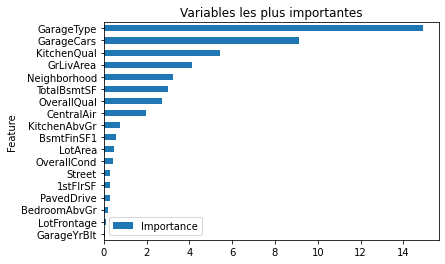

In [119]:
imp_df.sort_values("Importance").set_index("Feature")[0:20].plot(kind="barh")
plt.title("Variables les plus importantes")

In [120]:
newdata = pd.read_csv('newdata_transforme.csv', index_col=0)
newdata['SalePrice'] = bst.predict(xgb.DMatrix(newdata))

In [122]:
submission = pd.DataFrame(newdata["SalePrice"])
submission = np.exp(submission)
submission.to_csv("submission.csv")

In [76]:
X = train.drop(columns="SalePrice")
y = train.SalePrice

In [147]:
train1 = xgb.DMatrix(train.drop(columns="SalePrice"), label=train.SalePrice)
test1 = xgb.DMatrix(test.drop(columns="SalePrice"), label=test.SalePrice)


def objective(trial, train, test):

    param = {
        "objective": "reg:squarederror",
        "eval_metric": "rmse",
        "n_estimators": 1000,
        "max_depth": 2,
        "max_features": "auto",
        "min_samples_split": 2,
        "bootstrap": True
    }

    param["max_depth"] = trial.suggest_int("max_depth", 2, 32, log=True)
    param["max_features"] = trial.suggest_categorical("max_features", ["auto", "sqrt"])
    param["min_samples_split"] = trial.suggest_int("min_samples_split", 2, 10)
    param["min_samples_leaf"] = trial.suggest_int("min_samples_leaf", 1, 5)
    param["bootstrap"] = trial.suggest_categorical("bootstrap", [True, False])

    pruning_callback = optuna.integration.XGBoostPruningCallback(trial,
                                                                 'validation-rmse')
    bst = xgb.train(param, train1, evals=[(test1, 'validation')],
                    callbacks=[pruning_callback], maximize=False)
    preds = bst.predict(test1)

    rmse_score = sklearn.metrics.mean_squared_error(test1.get_label(),
                                                    preds, squared=False)
    return rmse_score


study = optuna.create_study(direction='minimize')
study.optimize(lambda trial: objective(trial, train1, test1), n_trials=100)

trial = study.best_trial

print('RMSE: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2021-06-19 01:29:12,189] A new study created in memory with name: no-name-aa1f591c-e3a9-4c69-9d9d-96b82d483cfb
[I 2021-06-19 01:29:12,236] Trial 0 finished with value: 0.3813921809196472 and parameters: {'max_depth': 2, 'max_features': 'sqrt', 'min_samples_split': 6, 'min_samples_leaf': 4, 'bootstrap': True}. Best is trial 0 with value: 0.3813921809196472.
[I 2021-06-19 01:29:12,288] Trial 1 finished with value: 0.3873077630996704 and parameters: {'max_depth': 21, 'max_features': 'auto', 'min_samples_split': 3, 'min_samples_leaf': 3, 'bootstrap': False}. Best is trial 0 with value: 0.3813921809196472.
[I 2021-06-19 01:29:12,335] Trial 2 finished with value: 0.3873077630996704 and parameters: {'max_depth': 23, 'max_features': 'auto', 'min_samples_split': 9, 'min_samples_leaf': 1, 'bootstrap': False}. Best is trial 0 with value: 0.3813921809196472.
[I 2021-06-19 01:29:12,385] Trial 3 finished with value: 0.3873077630996704 and parameters: {'max_depth': 17, 'max_features': 'auto', 'min

[I 2021-06-19 01:29:15,211] Trial 50 pruned. Trial was pruned at iteration 5.
[I 2021-06-19 01:29:15,288] Trial 51 finished with value: 0.385240763425827 and parameters: {'max_depth': 3, 'max_features': 'auto', 'min_samples_split': 6, 'min_samples_leaf': 3, 'bootstrap': False}. Best is trial 0 with value: 0.3813921809196472.
[I 2021-06-19 01:29:15,360] Trial 52 finished with value: 0.385240763425827 and parameters: {'max_depth': 3, 'max_features': 'auto', 'min_samples_split': 5, 'min_samples_leaf': 3, 'bootstrap': False}. Best is trial 0 with value: 0.3813921809196472.
[I 2021-06-19 01:29:15,408] Trial 53 pruned. Trial was pruned at iteration 5.
[I 2021-06-19 01:29:15,460] Trial 54 pruned. Trial was pruned at iteration 5.
[I 2021-06-19 01:29:15,513] Trial 55 pruned. Trial was pruned at iteration 5.
[I 2021-06-19 01:29:15,564] Trial 56 pruned. Trial was pruned at iteration 5.
[I 2021-06-19 01:29:15,616] Trial 57 pruned. Trial was pruned at iteration 5.
[I 2021-06-19 01:29:15,667] Trial 

In [148]:
trial.value

0.3813921809196472

In [149]:
trial.params

{'max_depth': 2,
 'max_features': 'sqrt',
 'min_samples_split': 6,
 'min_samples_leaf': 4,
 'bootstrap': True}

In [150]:
param = {
    "objective": "reg:squarederror",
    "eval_metric": "rmse",
    "n_estimators": 1000,
    'max_depth': 2,
    'max_features': 'sqrt',
    'min_samples_split': 6,
    'min_samples_leaf': 4,
    'bootstrap': True
    }

bst = xgb.train(param, train1)

In [151]:
p = bst.predict(test1)
sklearn.metrics.mean_squared_error(test1.get_label(), p, squared=False)

0.38139218

In [139]:
imp = bst.get_score(importance_type='gain')

In [140]:
imp_df = pd.DataFrame(list(zip(imp.values(), list(imp.keys()))),
                      columns=["Importance", "Feature"])

Text(0.5, 1.0, 'Variables les plus importantes')

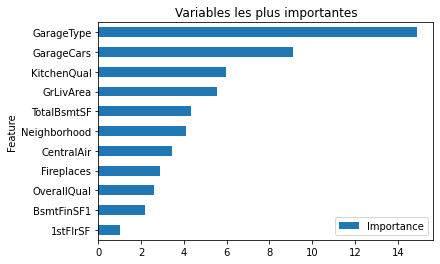

In [141]:
imp_df.sort_values("Importance").set_index("Feature")[0:20].plot(kind="barh")
plt.title("Variables les plus importantes")

In [152]:
newdata = pd.read_csv('newdata_transforme.csv', index_col=0)
newdata['SalePrice'] = rf.predict(newdata)

In [153]:
submission = pd.DataFrame(newdata["SalePrice"])
submission = np.exp(submission)
submission.to_csv("submission2.csv")

In [154]:
0.14397/newdata['SalePrice'].mean()

0.011988612647318587

### Nouveau test : sélectionnons manuellement une partie seulement des variables, qui semblent être particulièrement importantes d'après l'analyse

In [142]:
imp_vars = ["OverallQual", "YearBuilt", "YearRemodAdd", "BsmtFinSF1",
            "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "GrLivArea",
            "TotRmsAbvGrd", "Fireplaces", "GarageArea", "WoodDeckSF",
            "MSZoning", "Alley", "Neighborhood", "Condition1", "Condition2",
            "HouseStyle", "MasVnrType", "ExterQual", "Foundation", "BsmtQual",
            "CentralAir", "KitchenQual", "GarageQual", "PoolQC", "SaleType"]

In [144]:
train2 = xgb.DMatrix(train[imp_vars], label=train.SalePrice)
test2 = xgb.DMatrix(test[imp_vars], label=test.SalePrice)

In [145]:
study = optuna.create_study(direction='minimize')
study.optimize(lambda trial: objective(trial, train2, test2), n_trials=100)

trial = study.best_trial

print('RMSE: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2021-06-19 01:27:43,944] A new study created in memory with name: no-name-1bc79f01-5c2a-4166-a5c3-13af7c97636a
[I 2021-06-19 01:27:43,996] Trial 0 finished with value: 0.3813921809196472 and parameters: {'max_depth': 2, 'max_features': 'sqrt', 'min_samples_split': 2, 'min_samples_leaf': 3, 'bootstrap': False}. Best is trial 0 with value: 0.3813921809196472.
[I 2021-06-19 01:27:44,037] Trial 1 finished with value: 0.3813921809196472 and parameters: {'max_depth': 2, 'max_features': 'auto', 'min_samples_split': 2, 'min_samples_leaf': 1, 'bootstrap': True}. Best is trial 0 with value: 0.3813921809196472.
[I 2021-06-19 01:27:44,123] Trial 2 finished with value: 0.3871588110923767 and parameters: {'max_depth': 8, 'max_features': 'auto', 'min_samples_split': 8, 'min_samples_leaf': 4, 'bootstrap': True}. Best is trial 0 with value: 0.3813921809196472.
[I 2021-06-19 01:27:44,191] Trial 3 finished with value: 0.3873077630996704 and parameters: {'max_depth': 9, 'max_features': 'sqrt', 'min_sam

[I 2021-06-19 01:27:47,733] Trial 63 pruned. Trial was pruned at iteration 5.
[I 2021-06-19 01:27:47,782] Trial 64 pruned. Trial was pruned at iteration 5.
[I 2021-06-19 01:27:47,832] Trial 65 pruned. Trial was pruned at iteration 5.
[I 2021-06-19 01:27:47,883] Trial 66 pruned. Trial was pruned at iteration 5.
[I 2021-06-19 01:27:47,935] Trial 67 pruned. Trial was pruned at iteration 5.
[I 2021-06-19 01:27:48,004] Trial 68 finished with value: 0.3856247663497925 and parameters: {'max_depth': 3, 'max_features': 'auto', 'min_samples_split': 10, 'min_samples_leaf': 2, 'bootstrap': True}. Best is trial 0 with value: 0.3813921809196472.
[I 2021-06-19 01:27:48,073] Trial 69 finished with value: 0.3856247663497925 and parameters: {'max_depth': 3, 'max_features': 'auto', 'min_samples_split': 3, 'min_samples_leaf': 1, 'bootstrap': False}. Best is trial 0 with value: 0.3813921809196472.
[I 2021-06-19 01:27:48,122] Trial 70 pruned. Trial was pruned at iteration 5.
[I 2021-06-19 01:27:48,178] Tria

In [155]:
trial.value

0.3813921809196472

In [156]:
trial.params

{'max_depth': 2,
 'max_features': 'sqrt',
 'min_samples_split': 6,
 'min_samples_leaf': 4,
 'bootstrap': True}

In [157]:
param = {
    "objective": "reg:squarederror",
    "eval_metric": "rmse",
    "n_estimators": 1000,
    'max_depth': 2,
    'max_features': 'sqrt',
    'min_samples_split': 6,
    'min_samples_leaf': 4,
    'bootstrap': True
    }

bst = xgb.train(param, train2)

In [158]:
p = bst.predict(test2)
sklearn.metrics.mean_squared_error(test1.get_label(), p, squared=False)

0.38250852

In [159]:
imp = bst.get_score(importance_type='gain')

In [160]:
imp_df = pd.DataFrame(list(zip(imp.values(), list(imp.keys()))),
                      columns=["Importance", "Feature"])

Text(0.5, 1.0, 'Variables les plus importantes')

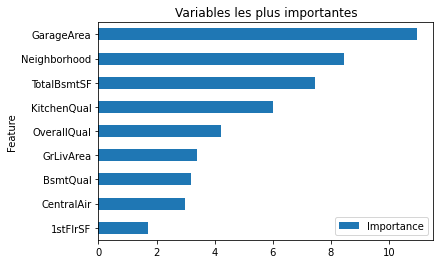

In [161]:
imp_df.sort_values("Importance").set_index("Feature")[0:20].plot(kind="barh")
plt.title("Variables les plus importantes")

In [162]:
newdata = pd.read_csv('newdata_transforme.csv', index_col=0)
newdata['SalePrice'] = rf.predict(newdata)

In [163]:
submission = pd.DataFrame(newdata["SalePrice"])
submission = np.exp(submission)
submission.to_csv("submission3.csv")